In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from scipy.stats import f_oneway

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Project Scoping

- Assessing the relationship between a country's average life expectancy and a country's GDP. Does an increase in one automatically correlate to an increase in the other?

- Where is life expectancy increasing, and at what rate?

- Where is GDP increasing, and at what rate?

In [6]:
df = pd.read_csv("all_data.csv")
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [7]:
print("Some information about the dataset.")
print(df.info())

Some information about the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [8]:
print(f"The dataframe covers the period between {df.Year.min()} and {df.Year.max()}.")

The dataframe covers the period between 2000 and 2015.


In [9]:
print(f"There are {df.Country.nunique()} countries in the dataframe. Here they are:")
for country in df.Country.unique():
    print(f"- {country}")

There are 6 countries in the dataframe. Here they are:
- Chile
- China
- Germany
- Mexico
- United States of America
- Zimbabwe


### Examining the distribution of life expectancy observations

In [10]:
print(f"Here is some information about the Life expectancy column.")
print(df["Life expectancy at birth (years)"].describe())

Here is some information about the Life expectancy column.
count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64


Let's use a boxplot to visualize the distribution of these observations.


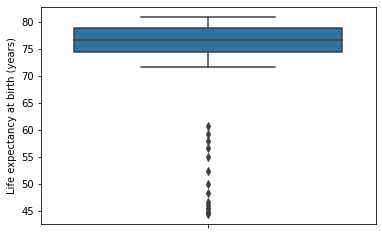

<Figure size 432x288 with 0 Axes>

In [11]:
print("Let's use a boxplot to visualize the distribution of these observations.")
sns.boxplot(data=df,
           y="Life expectancy at birth (years)")
plt.show()
plt.clf()

Let's visualize the same information in a histogram.


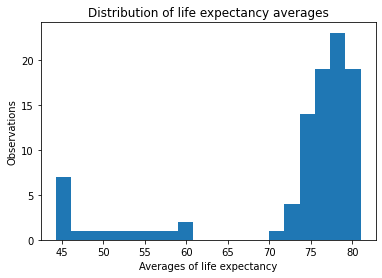

<Figure size 432x288 with 0 Axes>

In [12]:
print("Let's visualize the same information in a histogram.")
plt.hist(df["Life expectancy at birth (years)"], bins=20)
plt.title("Distribution of life expectancy averages")
plt.xlabel("Averages of life expectancy")
plt.ylabel("Observations")
plt.show()
plt.clf()

The histogram is left skewed, with many outliers for lower life averages.

### Examining the distribution of GDP (Gross Domestic Products) observations

In [13]:
print(f"Here is some information about the GDP column.")
print(df["GDP"].describe())

Here is some information about the GDP column.
count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64


Let's visualize the distribution of the GDP entries.


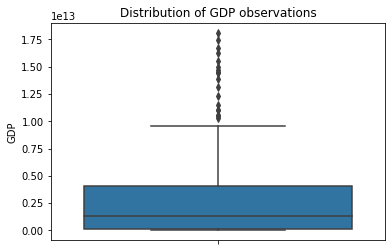

<Figure size 432x288 with 0 Axes>

In [14]:
print("Let's visualize the distribution of the GDP entries.")
sns.boxplot(data=df,
           y="GDP")
plt.title("Distribution of GDP observations")
plt.show()
plt.clf()

The observations for the GDP seem very skewed. Let's visualize the same information using a histogram.

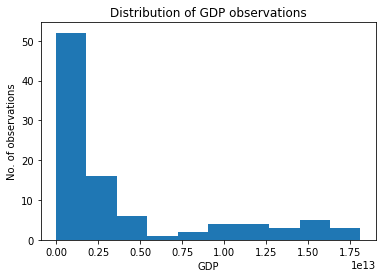

<Figure size 432x288 with 0 Axes>

In [15]:
plt.hist(df.GDP)
plt.title("Distribution of GDP observations")
plt.ylabel("No. of observations")
plt.xlabel("GDP")
plt.show()
plt.clf()

The histogram is very skewed to the right. Therefore, I will categorize the GDPs using the 25th and 75th percentiles.

#### Adding categorical column for lower and higher GDPs

In [16]:
df["GDP Category"] = df.apply(
                        lambda row: "Low" if row.GDP < 1.733018e+11 else (
                            "Average" if row.GDP < 4.067510e+12 else "High"), axis = 1)

In [17]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP GDP Category
0   Chile  2000                              77.3  7.786093e+10          Low
1   Chile  2001                              77.3  7.097992e+10          Low
2   Chile  2002                              77.8  6.973681e+10          Low
3   Chile  2003                              77.9  7.564346e+10          Low
4   Chile  2004                              78.0  9.921039e+10          Low


## Analysis of correlations

Let's start with the obvious question: is there a correlation between life expectancy and GDP?

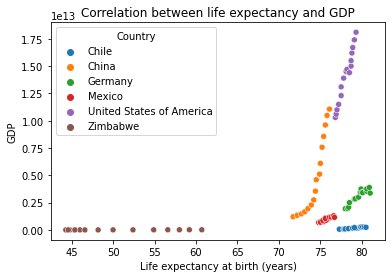

<Figure size 432x288 with 0 Axes>

In [18]:
sns.scatterplot(data=df,
               x="Life expectancy at birth (years)",
               y="GDP",
               hue="Country")
plt.title("Correlation between life expectancy and GDP")
plt.show()
plt.clf()

It seems to be the case, although with some differences, and with a group of observations where the life expectancy is very high while the GDP is very low.

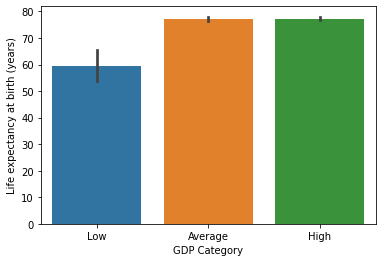

<Figure size 432x288 with 0 Axes>

In [19]:
sns.barplot(data=df,
           x="GDP Category",
           y="Life expectancy at birth (years)")
plt.show()
plt.clf()

### Verifying statistical significance of association between GDP Category and Life expectancy

In [20]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP,GDP Category
0,Chile,2000,77.3,7.786093e+10,Low
1,Chile,2001,77.3,7.097992e+10,Low
2,Chile,2002,77.8,6.973681e+10,Low
3,Chile,2003,77.9,7.564346e+10,Low
4,Chile,2004,78.0,9.921039e+10,Low


In [21]:
life_exp_low = df[df["GDP Category"] == "Low"]["Life expectancy at birth (years)"]
life_exp_avg = df[df["GDP Category"] == "Average"]["Life expectancy at birth (years)"]
life_exp_hig = df[df["GDP Category"] == "High"]["Life expectancy at birth (years)"]

In [22]:
fstat, pval = f_oneway(life_exp_low,
                      life_exp_avg,
                      life_exp_hig)

In [23]:
print(f"The probability that these three samples come from a population where the age expectancy is the same is "\
      f"{round(pval, 2)}", f"\n({pval}).")

The probability that these three samples come from a population where the age expectancy is the same is 0.0 
(7.209128151819974e-16).


In [24]:
tukey_results = pairwise_tukeyhsd(df["Life expectancy at birth (years)"],
                                 df["GDP Category"],
                                 0.05)

In [25]:
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj  lower    upper   reject
------------------------------------------------------
Average   High  -0.1438   0.9   -4.559   4.2715  False
Average    Low -17.8563 0.001 -22.2715  -13.441   True
   High    Low -17.7125 0.001 -22.8107 -12.6143   True
------------------------------------------------------


According to the Tukey's Range Test, there are statistically significant differences between the life expectancies of countries that have low GDPs and those that have average and high GDPs. However, there is no statistically significant difference between the life expectancies of countries with high GDPs and of countries with average GDPs.